In [1]:
import torch
from IPython.display import Image
from google.colab import drive
from google.colab import files

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14867, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14867 (delta 2), reused 2 (delta 0), pack-reused 14858
Receiving objects: 100% (14867/14867), 13.92 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (10233/10233), done.


In [ ]:
%cd /content/drive/MyDrive/SignatureObjectDetection/yolov5

/content/drive/MyDrive/SignatureObjectDetection/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 28.5 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 52.2 MB/s 


In [ ]:
# drive.mount("/content/drive", force_remount=True)
# !mv /content/drive/MyDrive/SignatureObjectDetection/dataset.yaml /content/yolov5/data/


In [2]:
!python /content/drive/MyDrive/SignatureObjectDetection/yolov5/train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=drive/MyDrive/SignatureObjectDetection/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/SignatureObjectDetection/yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git

In [4]:
!python /content/drive/MyDrive/SignatureObjectDetection/yolov5/detect.py --weights '/content/drive/MyDrive/SignatureObjectDetection/yolov5/runs/train/exp8/weights/best.pt'  --conf 0.6 --source '/content/drive/MyDrive/SignatureObjectDetection/test_dataset/images' --augment --line=3


detect: weights=['/content/drive/MyDrive/SignatureObjectDetection/yolov5/runs/train/exp8/weights/best.pt'], source=/content/drive/MyDrive/SignatureObjectDetection/test_dataset/images, data=drive/MyDrive/SignatureObjectDetection/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=SignatureObjectDetection, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/115 /content/drive/MyDrive/SignatureObjectDetection/test_dataset/images/680.jpg: 640x640 1 signature, 32.1ms
image 2/115 /content/drive/MyDrive/SignatureObjectDetection/t

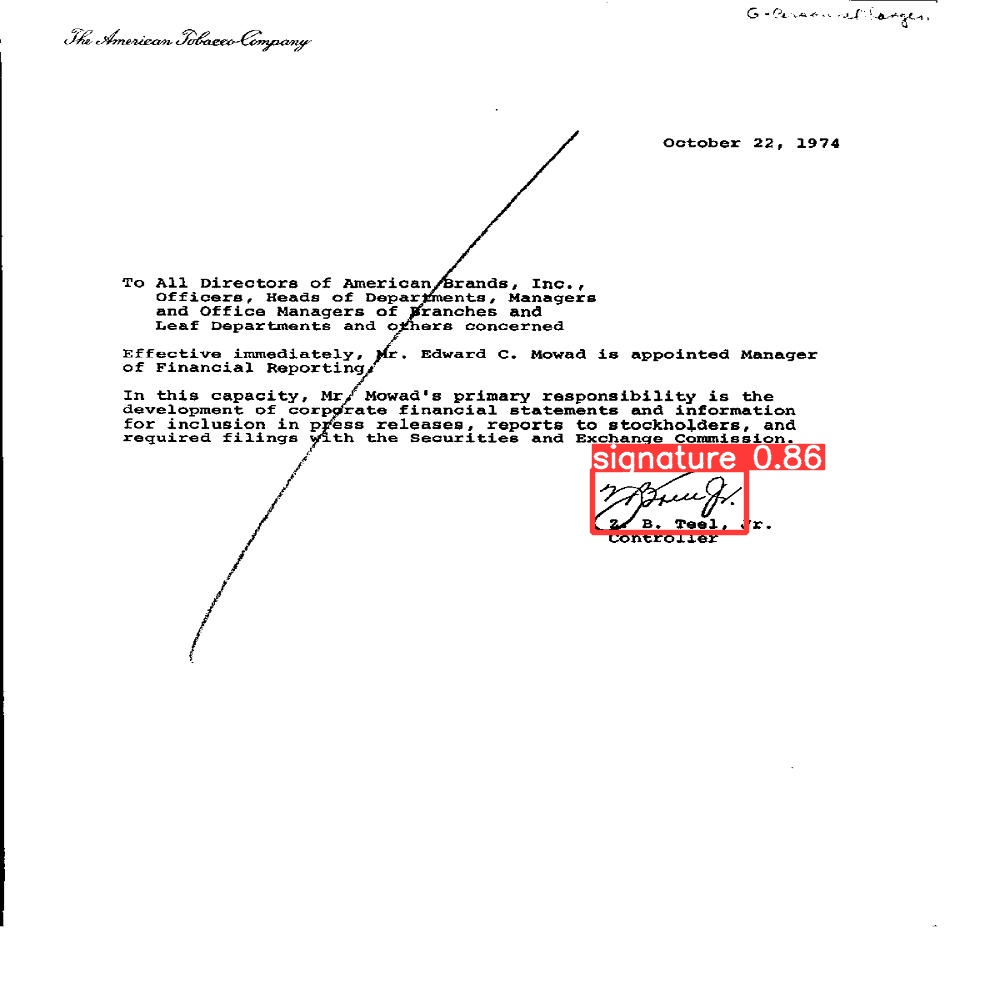

In [5]:
Image(filename='SignatureObjectDetection/detect_test2/718.jpg', width=416)


In [ ]:
from pathlib import Path
from PIL import Image

training_labels = Path("/content/drive/MyDrive/SignatureObjectDetection/TrainGroundTruth")
training_images = Path("/content/drive/MyDrive/SignatureObjectDetection/TrainImages")
all_txt_paths = training_labels.glob("*")

labels_output_dir = Path("/content/drive/MyDrive/SignatureObjectDetection/training_dataset/labels")
labels_output_dir.mkdir(parents=True, exist_ok=True)
images_output_dir = Path("/content/drive/MyDrive/SignatureObjectDetection/training_dataset/images")
images_output_dir.mkdir(parents=True, exist_ok=True)

for txt_path in all_txt_paths:
    img_path = training_images / f"{txt_path.stem}.tif"
    img = Image.open(img_path).convert("RGB")
    width, height = img.size
    with open(txt_path, "r") as f:
        labels = f.read().strip().split("\n")
    yolo_labels = []
    for label in labels:
        label = label.split(",")
        box_width = abs(int(label[2]) - int(label[0]))
        box_height = abs(int(label[3]) - int(label[1]))
        yolo_label = [0, abs(int(label[2]) + int(label[0])) / (2*width), abs(int(label[3]) + int(label[1])) / (2*height), box_width / width, box_height / height ]
        yolo_label = " ".join(map(str, yolo_label))
        yolo_labels.append(yolo_label)

    with open(labels_output_dir / f"{txt_path.stem}.txt", "w") as f:
        f.write("\n".join(yolo_labels))
    img.save(images_output_dir/f"{img_path.stem}.jpg")



In [6]:
!mv /content/SignatureObjectDetection /content/drive/MyDrive/SignatureObjectDetection